In [1]:
import pickle
import re

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/'

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

print(list(demo.keys()))

['f_22001_0_0', 'f_21003_3_0', 'f_21003_2_0', 'f_21000_0_0', 'CaAfCarDiff', 'CaIndDiff', 'CaChiDiff', 'f_21000_0_0_comb', 'longitudinal', '22438-0.0', '22828-0.0', '26201-0.0', '26202-0.0', '26203-0.0', '26204-0.0', '26205-0.0', '26206-0.0', '26207-0.0', '26208-0.0', '26209-0.0', '26210-0.0', '26211-0.0', '26212-0.0', '26213-0.0', '26214-0.0', '26215-0.0', '26216-0.0', '26217-0.0', '26218-0.0', '26219-0.0', '26220-0.0', '26221-0.0', '26222-0.0', '26223-0.0', '26224-0.0', '26225-0.0', '26226-0.0', '26227-0.0', '26228-0.0', '26229-0.0', '26231-0.0', '26232-0.0', '26233-0.0', '26234-0.0', '26235-0.0', '26236-0.0', '26237-0.0', '26238-0.0', '26239-0.0', '26240-0.0', '26241-0.0', '26242-0.0', '26243-0.0', '26244-0.0', '26245-0.0', '26246-0.0', '26247-0.0', '26248-0.0', '26249-0.0', '26250-0.0', '26251-0.0', '26252-0.0', '26253-0.0', '26254-0.0', '26255-0.0', '26256-0.0', '26257-0.0', '26258-0.0', '26259-0.0', '26260-0.0', '26261-0.0', '26262-0.0', '26263-0.0', '26264-0.0', '26265-0.0', '262

In [2]:
import numpy as np

first = dict(male=[], female=[], old=[], young=[])
second = dict(male=[], female=[], old=[], young=[])

for sub in demo['longitudinal']:
    try:
        p0 = np.load(f'{demodir}/fc/{sub}_task-20227-2_fc.npy')
        p1 = np.load(f'{demodir}/fc/{sub}_task-20227-3_fc.npy')
        if demo['f_21003_2_0'][sub] < 55:
            first['young'].append(p0)
            second['young'].append(p1)
        if demo['f_21003_2_0'][sub] > 65:
            first['old'].append(p0)
            second['old'].append(p1)
        if demo['f_22001_0_0'][sub] == 0:
            first['female'].append(p0)
            second['female'].append(p1)
        if demo['f_22001_0_0'][sub] == 1:
            first['male'].append(p0)
            second['male'].append(p1)
    except:
        continue
    
for dct in [first, second]:
    for name,grp in dct.items():
        grp = np.stack(grp)
        print(name, len(grp))

male 1289
female 1369
old 1022
young 456
male 1289
female 1369
old 1022
young 456


In [3]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [11]:
# Find number of increasers and decreasers in all groups

bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

def get_net_avg(bounds, net1, net2, first, second):
    fo = []
    so = []
    
    s1 = np.arange(bounds[net1], bounds[net1+1])
    s2 = np.arange(bounds[net2], bounds[net2+1])

    for lst,full in zip([fo, so],[first, second]):
        for i,v in enumerate(full):
            m = remap(vec2mat(v))
            c = m[np.ix_(s1,s2)].flatten()
            c = np.mean(c, keepdims=True)
            lst.append(c)

    fo = np.stack(fo)
    so = np.stack(so)
    
    return fo, so

for grp in ['male', 'female', 'young', 'old']:
    fo, so = get_net_avg(bounds, 0, 6, first[grp], second[grp])
    # fo, so = [np.mean(first[grp], axis=1), np.mean(second[grp], axis=1)]
    inc = np.sum(so > fo)
    dec = np.sum(fo > so)
    print(inc, dec, inc/len(fo), len(fo))
    

778 511 0.6035686578743211 1289
741 628 0.5412710007304602 1369
269 187 0.5899122807017544 456
577 445 0.5645792563600783 1022


/tmp/ipykernel_126456/1915960647.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


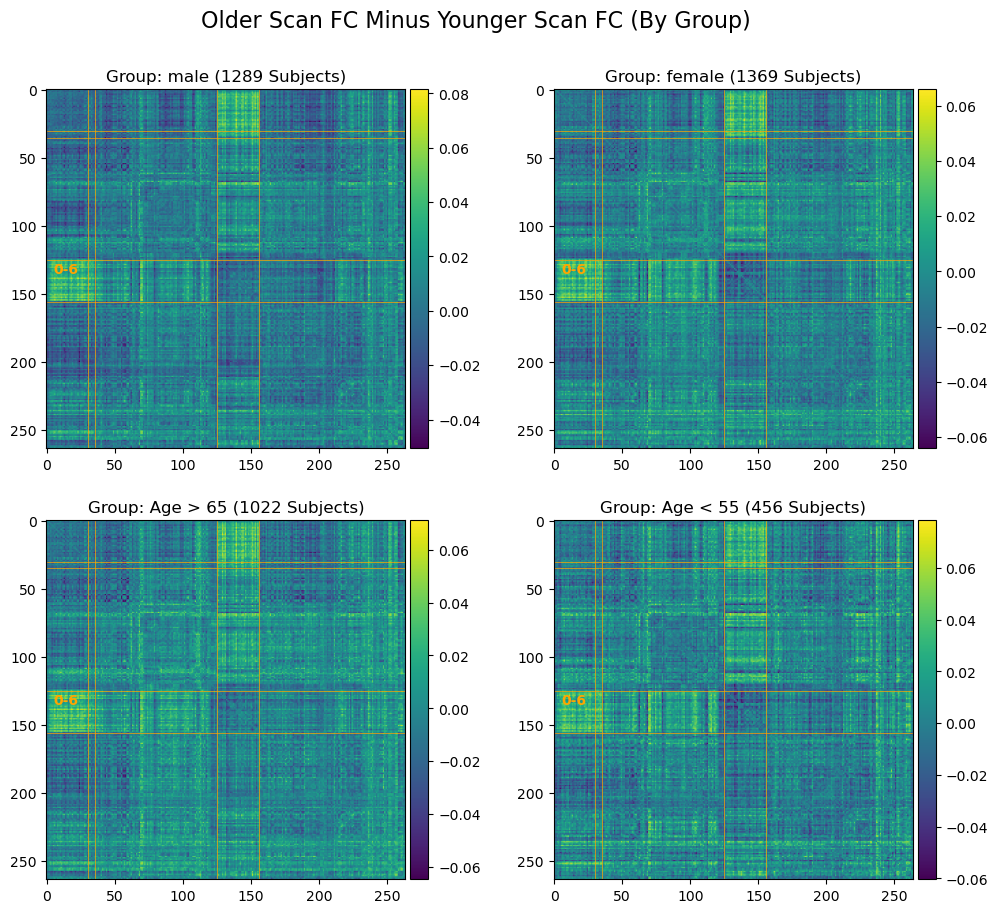

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

fig,ax = plt.subplots(2,2,figsize=(12,10))

for i,name in enumerate(first):
    i0 = int(i/2)
    i1 = i%2

    # Get difference between first and second

    mu2 = np.mean(first[name], axis=0)
    mu3 = np.mean(second[name], axis=0)

    im = ax[i0,i1].imshow(remap(vec2mat(mu3-mu2)))

    divider = make_axes_locatable(ax[i0,i1])
    cax = divider.append_axes('right', size='5%', pad=0.05)

    fig.colorbar(im, cax=cax, orientation='vertical')
    
    if name == 'old':
        gname = 'Age > 65'
    elif name == 'young':
        gname = 'Age < 55'
    else:
        gname = name
        
    ax[i0,i1].set_title(f'Group: {gname} ({len(first[name])} Subjects)')
    
    for a in [30, 35, 125, 156]:
        ax[i0,i1].plot([a,a],[0,263], color='orange', linewidth=0.5)
        ax[i0,i1].plot([0,263],[a,a], color='orange', linewidth=0.5)
        
    ax[i0,i1].text(5,135,'0-6',fontweight='bold',color='orange')
#     ax[i0,i1].text(125,135,'6-6',fontweight='bold',color='orange')
    
fig.suptitle('Older Scan FC Minus Younger Scan FC (By Group)', fontsize=16)
fig.subplots_adjust(top=0.9)

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig5.pdf')